# \*\*\[LLM\]\*\*Zeroshot

SEOYEON CHOI  
2023-08-26

# Purpose

1.  흐릿한 점을 주변의 명확한 사진(노드)로 추론해보는것,

    -   소프트맥스로 나온 결과가 애매한 것들

2.  노드로 인식하고 극중 상황을 추론하는 (싸움/긴장 등)

3.  흐릿한 이미지 -\> 추정

-   데이터 구하는 것이 어려움

1.  Object detection -\> 관계추정

2.  Multi-label -\> 관계추정

-   비슷한 이미지로 분류

# Import

In [65]:
import skimage
import numpy as np
from PIL import Image
import requests
import torch
from transformers import pipeline

In [66]:
import numpy as np
import os
from PIL import Image, ImageDraw

In [73]:
from datasets import load_dataset

# graph

In [40]:
cppe5 = load_dataset("cppe-5")

In [41]:
data_dict = {}
for z in range(len(cppe5['train'])) :
    image = cppe5["train"][z]["image"]
    annotations = cppe5["train"][z]["objects"]
    draw = ImageDraw.Draw(image)

    categories = cppe5["train"].features["objects"].feature["category"].names

    id2label = {index: x for index, x in enumerate(categories, start=0)}
    label2id = {v: k for k, v in id2label.items()}
    
    # for i in range(len(annotations["id"])):
    #     box = annotations["bbox"][i - 1]
    #     class_idx = annotations["category"][i - 1]
    #     x, y, w, h = tuple(box)
    #     draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    #     draw.text((x, y), id2label[class_idx], fill="white")

#     edge_matrix = np.zeros((len(categories), len(categories)), dtype=int)

#     for i in range(len(annotations['category'])-1):
#         edge_matrix[annotations['category'][i],annotations['category'][i+1]] = 1

#     edge_list = []

    # for i in range(edge_matrix.shape[0]):
    #     for j in range(edge_matrix.shape[1]):
    #         if edge_matrix[i, j] == 1:
    #             edge_list.append([i, j])
                
    data_dict[z] = {
        "image": image,
        "annotations": annotations,
        # "edge_matrix": edge_matrix,
        # "edge_list": edge_list
    }

In [42]:
data_dict[0]

In [44]:
cppe5['train'].features['objects']

# coco data

https://huggingface.co/datasets?task_categories=task_categories:object-detection&sort=trending

In [25]:
a = load_dataset('nateraw/kitti')

























Generating test split: 100%|██████████| 7518/7518 [00:25<00:00, 289.69 examples/s]

In [26]:
a

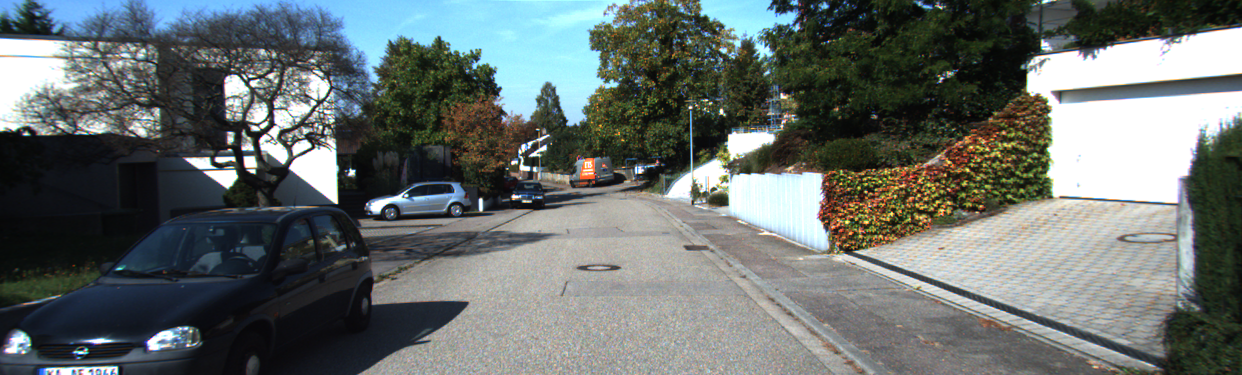

In [27]:
a['train']['image'][0]

In [28]:
a['train']['label'][0]

In [ ]:
data_dict_a = {}
for z in range(len(a['train'])) :
    image = a["train"][z]["image"]
    annotations = a["train"][z]["label"]
    draw = ImageDraw.Draw(image)

    categories =a['train']['label'][0][0]['type']

    id2label = {index: x for index, x in enumerate(categories, start=0)}
    label2id = {v: k for k, v in id2label.items()}
    
    # for i in range(len(annotations["id"])):
    #     box = annotations["bbox"][i - 1]
    #     class_idx = annotations["category"][i - 1]
    #     x, y, w, h = tuple(box)
    #     draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    #     draw.text((x, y), id2label[class_idx], fill="white")

#     edge_matrix = np.zeros((len(categories), len(categories)), dtype=int)

#     for i in range(len(annotations['category'])-1):
#         edge_matrix[annotations['category'][i],annotations['category'][i+1]] = 1

#     edge_list = []

    # for i in range(edge_matrix.shape[0]):
    #     for j in range(edge_matrix.shape[1]):
    #         if edge_matrix[i, j] == 1:
    #             edge_list.append([i, j])
                
    data_dict_a [z] = {
        "image": image,
        "annotations": annotations,
        # "edge_matrix": edge_matrix,
        # "edge_list": edge_list
    }

In [91]:
data_dict_a[0]

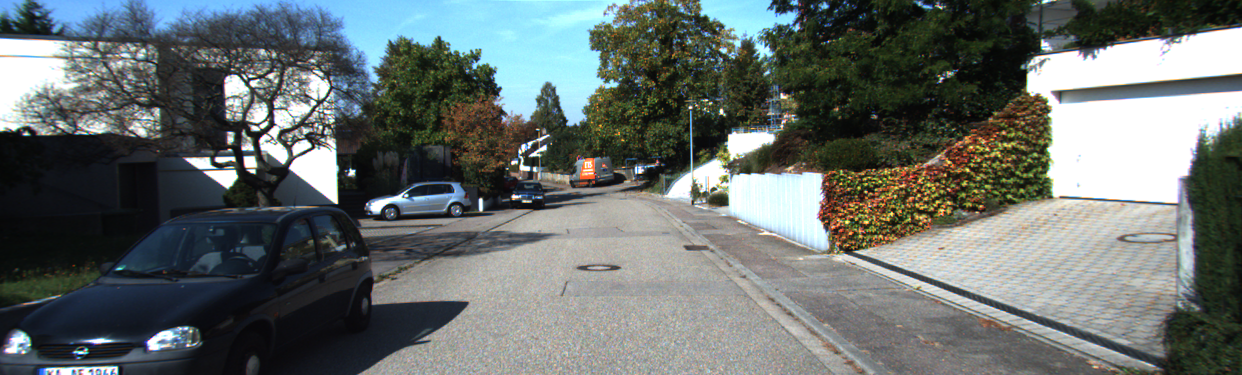

In [94]:
data_dict_a[0]['image']